# Importar Bibliotecas

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve

# Importar dados

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='liac-arff')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [36]:
some_digit = X.loc[[1]].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

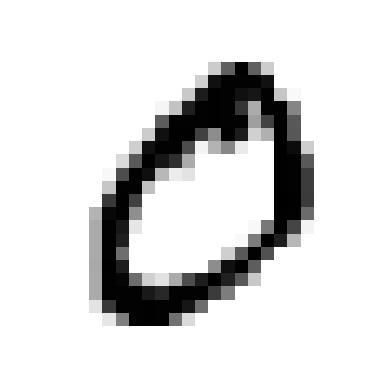

In [7]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[[1]]

1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
X_train, X_teste, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [11]:
y_train[y_train == 5].value_counts()

class
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: count, dtype: int64

# Treinando um Classificador Binários

In [12]:
y_train = y_train.astype(int)

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
y_test_5.shape, y_train_5.shape

((10000,), (60000,))

In [15]:
y_train_5.value_counts()

class
False    54579
True      5421
Name: count, dtype: int64

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
 sgd_clf.predict(X.loc[[1]])

array([False])

# Calculo de Desempenho

## Validação Cruzada

In [18]:
cross_val_score(sgd_clf, X_train, y_train-5, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [19]:
class NeverClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = NeverClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Matriz de Confusão 

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [23]:
matrix_confusao = confusion_matrix(y_train_5, y_train_pred)
matrix_confusao

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

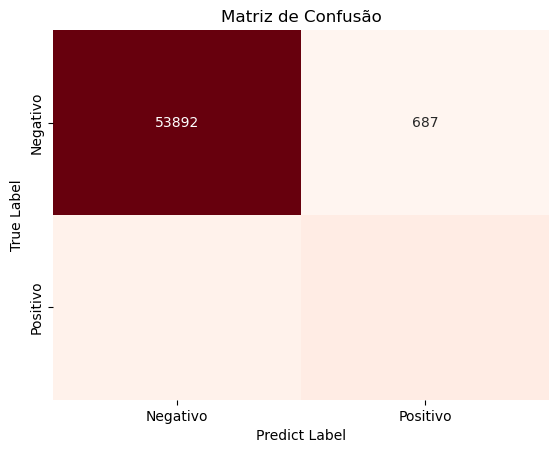

In [24]:
sns.heatmap(matrix_confusao, annot=True, fmt='d', cbar=False, cmap='Reds',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])

plt.title('Matriz de Confusão')

plt.xlabel('Predict Label')
plt.ylabel('True Label')

plt.show()

In [25]:
# Exibe o número de True Positives (TP), que são os casos em que o modelo previu corretamente a classe positiva.
print('True Positives(TP) = ', matrix_confusao[1,1])

# Exibe o número de True Negatives (TN), que são os casos em que o modelo previu corretamente a classe negativa.
print('True Negatives(TN) = ', matrix_confusao[0,0])

# Exibe o número de False Positives (FP), que são os casos em que o modelo previu incorretamente a classe positiva.
print('False Positives(FP) = ', matrix_confusao[0,1])

# Exibe o número de False Negatives (FN), que são os casos em que o modelo previu incorretamente a classe negativa.
print('False Negatives(FN) = ', matrix_confusao[1,0])

True Positives(TP) =  3530
True Negatives(TN) =  53892
False Positives(FP) =  687
False Negatives(FN) =  1891


## Precisão e Revocação

In [26]:
# Acurácia: Proporção de previsões corretas em relação ao total de previsões
print(f'Acurácia: {accuracy_score(y_train_5, y_train_pred)}')

# Precisão: Proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos
print(f'Precisão: {precision_score(y_train_5, y_train_pred)}')

# Recall (Sensibilidade): Proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos
print(f'Recall (Sensibilidade): {recall_score(y_train_5, y_train_pred)}')

# F1-Score: Média harmônica entre precisão e recall
print(f'F1-Score: {f1_score(y_train_5, y_train_pred)}')

Acurácia: 0.9570333333333333
Precisão: 0.8370879772350012
Recall (Sensibilidade): 0.6511713705958311
F1-Score: 0.7325171197343846


## Trade Off Precisão/Revocação

In [30]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

C:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-5897.37359354])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
threshold = -6000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

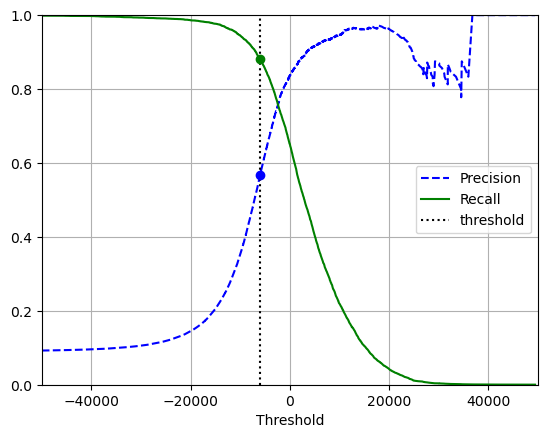

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
    idx = (thresholds >= threshold).argmax() 
    plt.plot(thresholds[idx], precisions[idx], "bo")
    plt.plot(thresholds[idx], recalls[idx], "go")
    plt.axis([-50000, 50000, 0, 1])
    plt.grid()
    plt.xlabel("Threshold")
    plt.legend(loc="center right")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

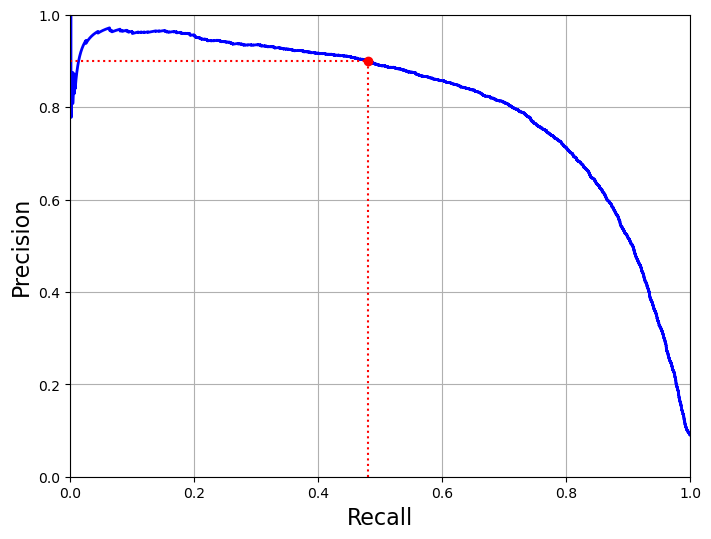

In [54]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

## Curva ROC